In [1]:
# when you change the code of .py document in the ecolab package, you have to restart the kernel of jupyter notebook and 
# run the below import code again to make sure the newest change involved.

import numpy as np
import numba
from ecolab import run_ecolab
from ecolab.environment import Environment
from ecolab.agents import Rabbit, RHD_Status
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [2]:
def average_arrays(arr, runs):
    
    avg_array = (arr[0] + arr[1] + arr[2] + arr[3] + arr[4] + arr[5] + arr[6] + arr[7] + arr[8] + arr[9])/runs
    
    return avg_array

In [3]:
# create the environment
env = Environment(shape = [10,10])

In [4]:
def generate_agents(Total_agents = 100, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1):
    ''' A function to output agents based on user defined variables
    Total_agents - Total number of agents
    prop_infants - Proportion of infants based on total agents
    prop_adults - Proportion of adults based on total agents
    prop_infected - Proportion of infected adults based on total number of adults
    Output: a list of agents'''
    
    N_infants = round(prop_infants*Total_agents)
    N_sus_adults = round(prop_adults*(Total_agents-N_infants))
    N_infected_adults = round(prop_infected*prop_adults*Total_agents)
    agents = []
    
    for i in range(N_infants):
        infant = Rabbit(age = np.random.randint(0,90), position = env.get_random_location()) ## age < 90 => infants
        agents.append(infant)
    for i in range(N_sus_adults):
        adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location())
        agents.append(adult)
    for i in range(N_infected_adults):
        infected_adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location(), infected=True)
        agents.append(infected_adult)
        
    return agents

In [37]:
def batch_simulation(Total_agents=100, prop_infants=0.1, prop_adults=0.9, prop_infected=0.1, num_model_runs=10, max_density=10, transmission=2, CARCASS_INFECTION_PROB=0.2):
    ''' A function to run the ecolab simulation several times to account for stochasticity
    It outputs the mean, standard deviation, and confidence interval of the proportion of infected rabbits '''
    
    batch_mean_infected = []
    
    for i in range(num_model_runs):
        agents = generate_agents(Total_agents=Total_agents, prop_infants=prop_infants,prop_adults=prop_adults,prop_infected=prop_infected)
        record2, sus, infected, immune, total, infant, agents = run_ecolab(env, agents, Niteration=[0, 365], max_density = max_density, transmission=transmission, CARCASS_INFECTION_PROB=CARCASS_INFECTION_PROB)
        batch_prop_infected = np.divide(infected, total)
        batch_mean_infected.append(batch_prop_infected)
        
    mean_infected = np.mean(batch_mean_infected)
    stdev_infected = np.std(batch_mean_infected)
    ci_infected = 1.96 * stdev_infected / sqrt(len(batch_mean_infected))
    
    average_batch_infected = average_arrays(batch_mean_infected, num_model_runs)
    
    return average_batch_infected, mean_infected, stdev_infected, ci_infected


## Carrying Capacity


<li>Infection fixed at 2
<li>Initial pop fixed at 50
<li>Carcass infection prob fixed at 0.2

In [38]:
batch_mean_infected_5, mean_infected_5, stdev_infected_5, ci_infected_5 = batch_simulation(Total_agents = 50, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10, max_density=5, transmission=2)
lower_50, upper_50 = mean_infected_5-ci_infected_5, mean_infected_5+ci_infected_5
print(f'The mean proportion of infected rabbits with a maximum density of 5 is: {mean_infected_5:.4f}')
print(f'The standard deviation is: {stdev_infected_5:.4f}')
print(f'It follows that the 95% confidence intervals are: {lower_50:.4f} and {upper_50:.4f}')


The mean proportion of infected rabbits with a maximum density of 5 is: 0.0534
The standard deviation is: 0.0940
It follows that the 95% confidence intervals are: -0.0049 and 0.1117


In [39]:
batch_mean_infected_10, mean_infected_10, stdev_infected_10, ci_infected_10 = batch_simulation(Total_agents = 50, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10, max_density=10)
lower_50, upper_50 = mean_infected_10-ci_infected_10, mean_infected_10+ci_infected_10
print(f'The mean proportion of infected rabbits with a maximum density of 5 is: {mean_infected_10:.4f}')
print(f'The standard deviation is: {stdev_infected_10:.4f}')
print(f'It follows that the 95% confidence intervals are: {lower_50:.4f} and {upper_50:.4f}')


The mean proportion of infected rabbits with a maximum density of 5 is: 0.0531
The standard deviation is: 0.0925
It follows that the 95% confidence intervals are: -0.0043 and 0.1104


In [40]:
batch_mean_infected_15, mean_infected_15, stdev_infected_15, ci_infected_15 = batch_simulation(Total_agents = 50, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10, max_density=15)
lower_50, upper_50 = mean_infected_15-ci_infected_15, mean_infected_15+ci_infected_15
print(f'The mean proportion of infected rabbits with a maximum density of 5 is: {mean_infected_15:.4f}')
print(f'The standard deviation is: {stdev_infected_15:.4f}')
print(f'It follows that the 95% confidence intervals are: {lower_50:.4f} and {upper_50:.4f}')


The mean proportion of infected rabbits with a maximum density of 5 is: 0.0539
The standard deviation is: 0.0933
It follows that the 95% confidence intervals are: -0.0040 and 0.1117


Text(0, 0.5, 'Mean proportion of infected rabbits')

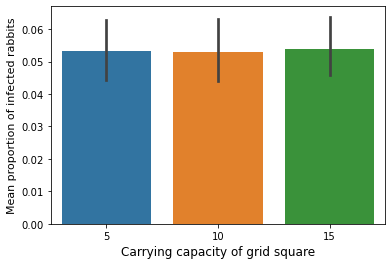

In [41]:
xlabels = ['5', '10', '15']
g = sns.barplot(data = [batch_mean_infected_5, batch_mean_infected_10, batch_mean_infected_15])
#g.set_xticks(xlabels)
g.set_xticklabels(xlabels)
g.set_xlabel("Carrying capacity of grid square", fontsize = 12)
g.set_ylabel("Mean proportion of infected rabbits", fontsize = 11)

We should look to test whether the means under the different initial populations are statistically equal to each other

H_0: The two sample means are equal

H_a: The two sample means are not equal

In [ ]:
import scipy.stats as stats
t, p = stats.ttest_ind_from_stats(mean_infected_5, stdev_infected_5, 10, mean_infected_10, stdev_infected_10, 10, equal_var=False)
t, p


The p-value is greater than alpha of 0.05 (95% confidence) therefore we fail to reject the null hypothesis. There is no sufficient evidence to conclude that at initial populations of 50 and 100, their proportions of infected rabbits are different

In [ ]:
t1,p1 = stats.ttest_ind_from_stats(mean_infected_10, stdev_infected_10, 10, mean_infected_15, stdev_infected_15, 10, equal_var=False)
t1,p1


In [ ]:
t2,p2 = stats.ttest_ind_from_stats(mean_infected_5, stdev_infected_5, 10, mean_infected_15, stdev_infected_15, 10, equal_var=False)
t2,p2


## Infection Rate

<li>Initial pop fixed at 50
<li>Carrying capacity fixed at 10
<li>Carcass infection prob fixed at 0.2

In [42]:
batch_mean_infected_2, mean_infected_2, stdev_infected_2, ci_infected_2 = batch_simulation(Total_agents = 50, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10, max_density=10)
lower_50, upper_50 = mean_infected_2-ci_infected_2, mean_infected_2+ci_infected_2
print(f'The mean proportion of infected rabbits with a maximum density of 5 is: {mean_infected_2:.4f}')
print(f'The standard deviation is: {stdev_infected_2:.4f}')
print(f'It follows that the 95% confidence intervals are: {lower_50:.4f} and {upper_50:.4f}')


The mean proportion of infected rabbits with a maximum density of 5 is: 0.0537
The standard deviation is: 0.0899
It follows that the 95% confidence intervals are: -0.0020 and 0.1094


In [43]:
batch_mean_infected_1, mean_infected_1, stdev_infected_1, ci_infected_1 = batch_simulation(Total_agents = 50, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10, max_density=10, transmission=1)
lower_50, upper_50 = mean_infected_1-ci_infected_1, mean_infected_1+ci_infected_1
print(f'The mean proportion of infected rabbits with a maximum density of 5 is: {mean_infected_1:.4f}')
print(f'The standard deviation is: {stdev_infected_1:.4f}')
print(f'It follows that the 95% confidence intervals are: {lower_50:.4f} and {upper_50:.4f}')


The mean proportion of infected rabbits with a maximum density of 5 is: 0.0532
The standard deviation is: 0.0910
It follows that the 95% confidence intervals are: -0.0032 and 0.1097


Text(0, 0.5, 'Mean proportion of infected rabbits')

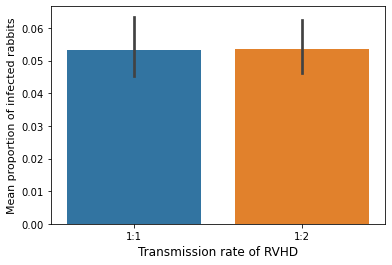

In [44]:
xlabels = ['1:1', '1:2']
g = sns.barplot(data = [batch_mean_infected_1, batch_mean_infected_2])
#g.set_xticks(xlabels)
g.set_xticklabels(xlabels)
g.set_xlabel("Transmission rate of RVHD", fontsize = 12)
g.set_ylabel("Mean proportion of infected rabbits", fontsize = 11)

## Carcass Infectivity

<li>Initial pop fixed at 50
<li>Transmission fixed at 1:2
<li>Carry capacity fixed at 10


In [13]:
batch_mean_infected_20, mean_infected_20, stdev_infected_20, ci_infected_20 = batch_simulation(Total_agents = 50, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10, max_density=10, transmission=2, CARCASS_INFECTION_PROB=0.2)
lower_50, upper_50 = mean_infected_20-ci_infected_20, mean_infected_20+ci_infected_20
print(f'The mean proportion of infected rabbits with a maximum density of 5 is: {mean_infected_20:.4f}')
print(f'The standard deviation is: {stdev_infected_20:.4f}')
print(f'It follows that the 95% confidence intervals are: {lower_50:.4f} and {upper_50:.4f}')


The mean proportion of infected rabbits with a maximum density of 5 is: 0.0537
The standard deviation is: 0.0988
It follows that the 95% confidence intervals are: -0.0075 and 0.1149


In [14]:
batch_mean_infected_50, mean_infected_50, stdev_infected_50, ci_infected_50 = batch_simulation(Total_agents = 50, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10, max_density=10, transmission=2, CARCASS_INFECTION_PROB=0.5)
lower_50, upper_50 = mean_infected_50-ci_infected_50, mean_infected_50+ci_infected_50
print(f'The mean proportion of infected rabbits with a maximum density of 5 is: {mean_infected_50:.4f}')
print(f'The standard deviation is: {stdev_infected_50:.4f}')
print(f'It follows that the 95% confidence intervals are: {lower_50:.4f} and {upper_50:.4f}')


The mean proportion of infected rabbits with a maximum density of 5 is: 0.0546
The standard deviation is: 0.0876
It follows that the 95% confidence intervals are: 0.0003 and 0.1089


In [15]:
batch_mean_infected_80, mean_infected_80, stdev_infected_80, ci_infected_80 = batch_simulation(Total_agents = 50, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10, max_density=10, transmission=2, CARCASS_INFECTION_PROB=0.8)
lower_50, upper_50 = mean_infected_80-ci_infected_80, mean_infected_80+ci_infected_80
print(f'The mean proportion of infected rabbits with a maximum density of 5 is: {mean_infected_80:.4f}')
print(f'The standard deviation is: {stdev_infected_80:.4f}')
print(f'It follows that the 95% confidence intervals are: {lower_50:.4f} and {upper_50:.4f}')


The mean proportion of infected rabbits with a maximum density of 5 is: 0.0557
The standard deviation is: 0.0949
It follows that the 95% confidence intervals are: -0.0031 and 0.1146


Text(0, 0.5, 'Mean proportion of infected rabbits')

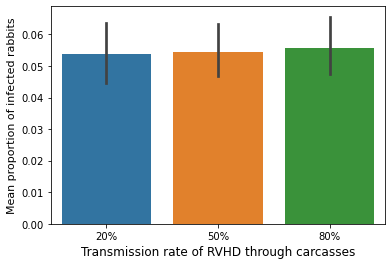

In [23]:
xlabels = ['20%', '50%', '80%']
g = sns.barplot(data = [batch_mean_infected_20, batch_mean_infected_50, batch_mean_infected_80])
#g.set_xticks(xlabels)
g.set_xticklabels(xlabels)
g.set_xlabel("Transmission rate of RVHD through carcasses", fontsize = 12)
g.set_ylabel("Mean proportion of infected rabbits", fontsize = 11)

In [ ]:
sus, infected, immune, total, infant, agents = run_ecolab(env, agents_sample, Niteration=[0, 365], max_density = 10)

In [ ]:
%matplotlib inline

fig, ax = plt.subplots()
#ax.plot(total, label='Total')
ax.plot(immune, label='Immune')
ax.plot(sus, label='Susceptible')
ax.plot(infected, label='Infected')
plt.xlabel('Day')
plt.ylabel('Number of Rabbits')

leg = ax.legend();

In [ ]:
#def draw_animation(fig,record,fps=20,saveto=None):
    """
    Draw the animation for the content of record. This doesn't use the draw
    functions of the classes.
    - fig figure to draw to
    - record = the data to draw
    - fps = frames per second
    - saveto = where to save it to
    """
    #rc('animation', html='html5')
    if len(record)==0: return None

    im = plt.imshow(np.zeros_like(record[0]['infected agents']), interpolation='none', aspect='auto', vmin=0, vmax=3, cmap='gray')
    ax = plt.gca()

    #foxesplot = ax.plot(np.zeros(1),np.zeros(1),'bo',markersize=10)
    rabbitsplot = ax.plot(np.zeros(1),np.zeros(1),'yx',markersize=10,mew=3)

    def animate_func(i):
            im.set_array(record[i]['infected agents'])
            ags = record[i]['total']
            if len(ags)==0:
                rabbitsplot[0].set_data([],[])
                #foxesplot[0].set_data([],[])
                return
            coords = ags[ags[:,-1].astype(bool),0:2]
            rabbitsplot[0].set_data(coords[:,1],coords[:,0])
            #coords = ags[~ags[:,-1].astype(bool),0:2]
            #foxesplot[0].set_data(coords[:,1],coords[:,0])
            #return [im]#,rabbits,foxes]

    anim = animation.FuncAnimation(
                                   fig, 
                                   animate_func, 
                                   frames = len(record),
                                   interval = 1000 / fps, repeat=False # in ms
                                   )
    if saveto is not None: anim.save(saveto, fps=fps, extra_args=['-vcodec', 'libx264']) 
    from IPython.display import HTML
    return HTML(anim.to_jshtml())

In [ ]:
def batch_simulation2(Total_agents = 100, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10):
    N_infants = round(prop_infants*Total_agents)
    N_sus_adults = round(prop_adults*(Total_agents-N_infants))
    N_infected_adults = round(prop_infected*prop_adults*Total_agents)
    agents = []
    batch_mean_sus, batch_mean_infected, batch_mean_immune = [], [], []
    batch_infant, batch_total = [], []
    
    for i in range(N_infants):
        infant = Rabbit(age = np.random.randint(0,90), position = env.get_random_location()) ## age < 90 => infants
        agents.append(infant)
    for i in range(N_sus_adults):
        adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location())
        agents.append(adult)
    for i in range(N_infected_adults):
        infected_adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location(), infected=True)
        agents.append(infected_adult)
    
    for i in range(num_model_runs):
        sus, infected, immune, total, infant, agents = run_ecolab(env, agents, Niteration=[0, 365], max_density = 10)
        batch_infant.append(infant)
        batch_total.append(total)
        batch_prop_sus, batch_prop_infected, batch_prop_immune = np.divide(sus, total), np.divide(infected, total), np.divide(immune, total)
        batch_mean_sus.append(batch_prop_sus)
        batch_mean_infected.append(batch_prop_infected)
        batch_mean_immune.append(batch_prop_immune)
        
    mean_sus, mean_infected, mean_immune = np.mean(batch_mean_sus), np.mean(batch_mean_infected), np.mean(batch_mean_immune)
    stdev_sus, stdev_infected, stdev_immune = np.std(batch_mean_sus), np.std(batch_mean_infected), np.std(batch_mean_immune)
    ci_sus = 1.96 * stdev_sus / sqrt(len(batch_mean_sus))
    ci_infected = 1.96 * stdev_infected / sqrt(len(batch_mean_infected))
    ci_immune = 1.96 * stdev_immune / sqrt(len(batch_mean_immune))
    
    return batch_infant, batch_total, mean_sus, mean_infected, mean_immune, stdev_sus, stdev_infected, stdev_immune, ci_sus, ci_infected, ci_immune